Aluno: Fernando Zolubas Preto
Nusp: 10694192

Esse notebook contem apenas o "data preparation" A implementacao do algoritimo KNN, o cross validation e o teste de accuracy estão no outro notebook.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
import pandas as pd

In [2]:
adult = pd.read_csv(r"C:\Users\Fernando\Desktop\Poli Usp\4 semestre\Machine Learning\adult.csv",
        names=[
        "Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"],
        sep=r'\s*,\s*',
        engine='python',
        na_values="?")

In [3]:
adult.shape 

(32561, 15)

A data base possui 32561 entrevistados; 14 perguntas (atributos); 1 Classificacao (Lable)


In [4]:
adult.head() #printei o "cabecalho dos dados" para visualizar como seria a minha base de dados.

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Data perp (Preparacao dos dados)


Estrategias de visualizacao dos dados. 1) Contabilidade de elementos em cada lable 2) Graficar em barras (contabilizar visualmente) 3) Outros graficos que permitam entender o problema 4) Graficar graficos Xi vs Y

In [5]:
# Essa funcao permite saber
#quantas pessoas com dada caracteristica ganham menos de 50k anualmente
def ganhaPouco(caracteristica,nome_coluna):
    estado = 0
    total = 0
    for i in range(adult.shape[0]):
        if (adult[nome_coluna][i]==caracteristica):
            total = total + 1
            if (adult["Target"][i]=="<=50K"):
                estado = estado + 1
    print("Numero de: ", caracteristica,"que ganham <=50k :" , estado)
    print("Numero total de : ", caracteristica, total)
    print("Porcentagem de pessoas que ganham menos de 50k : ",100*estado/total,"%")
    print(" ")

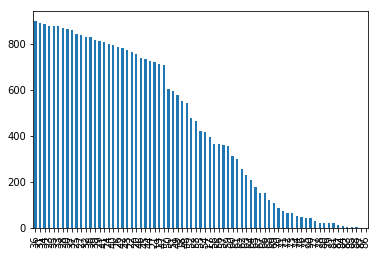

In [6]:
adult["Age"].value_counts().plot(kind="bar")

A idade nao aprensenta grande pico em algum valor em especial. Sendo assim parece razoavel considera-la na anlise do KNN.

In [7]:
adult["Workclass"].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: Workclass, dtype: int64

Dos dados concluimos, sem muito rigor, que existe uma chance de 70% de uma outra pessoa se enquadrar nessa categoria que eh dominante no mercado de trabalho em que se aplica o classificador almejado. Ou seja, nao compensa usar essa caracteristica no KNN pois em muitos casos os vizinhos mais proximos serao trabalhadores da classe privada independentemente de considera-la ou nao na analise do KNN.

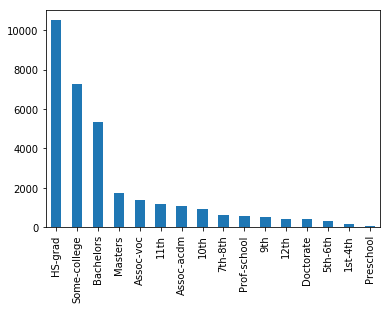

In [8]:
adult["Education"].value_counts().plot(kind="bar")

In [9]:
ganhaPouco("HS-grad","Education")

Numero de:  HS-grad que ganham <=50k : 8826
Numero total de :  HS-grad 10501
Porcentagem de pessoas que ganham menos de 50k :  84.04913817731645 %
 


In [10]:
ganhaPouco("Some-college","Education")

Numero de:  Some-college que ganham <=50k : 5904
Numero total de :  Some-college 7291
Porcentagem de pessoas que ganham menos de 50k :  80.97654642710191 %
 


In [11]:
ganhaPouco("Prof-school","Education")

Numero de:  Prof-school que ganham <=50k : 153
Numero total de :  Prof-school 576
Porcentagem de pessoas que ganham menos de 50k :  26.5625 %
 


Vemos que em relacao a educacao temos uma distribuicao mais heterogenea em relacao a Workclass apesar de desequilibrada. Pelos resultados da funcao "ganhaPouco()" notamos que saber se uma pessoa se encaixa em prof-school ou em Some-college parece ter influencia relevante no resultado da predicao aqui pretendida. Por isso opta-se por manter esse atributo na analise. 

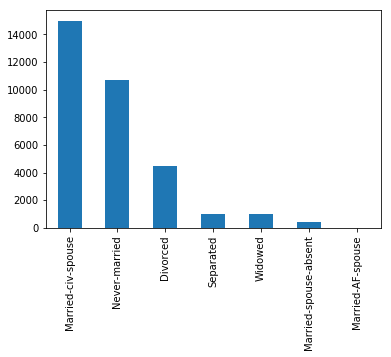

In [12]:
adult["Martial Status"].value_counts().plot(kind="bar")

In [13]:
ganhaPouco("Married-civ-spouse","Martial Status")

Numero de:  Married-civ-spouse que ganham <=50k : 8284
Numero total de :  Married-civ-spouse 14976
Porcentagem de pessoas que ganham menos de 50k :  55.31517094017094 %
 


Vemos que metade das pessoas sao casadas e que ocorre uma distribuicao homogenea dentro desse grupo entre aqueles que ganham mais e menos de 50k por ano. Sendo assim nao parece fazer sentido considerar atributo para o algoritimo KNN.

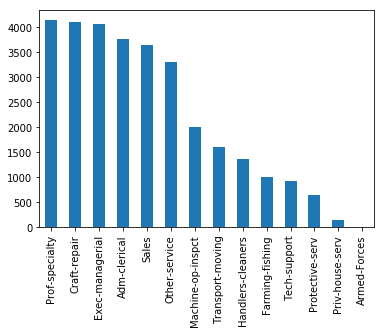

In [14]:
adult["Occupation"].value_counts().plot(kind="bar")

In [15]:
adult["Occupation"].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: Occupation, dtype: int64

In [16]:
ganhaPouco("Prof-specialty","Occupation")

Numero de:  Prof-specialty que ganham <=50k : 2281
Numero total de :  Prof-specialty 4140
Porcentagem de pessoas que ganham menos de 50k :  55.09661835748792 %
 


In [17]:
ganhaPouco("Craft-repair","Occupation")

Numero de:  Craft-repair que ganham <=50k : 3170
Numero total de :  Craft-repair 4099
Porcentagem de pessoas que ganham menos de 50k :  77.33593559404733 %
 


In [18]:
ganhaPouco("Exec-managerial","Occupation")

Numero de:  Exec-managerial que ganham <=50k : 2098
Numero total de :  Exec-managerial 4066
Porcentagem de pessoas que ganham menos de 50k :  51.59862272503689 %
 


In [19]:
ganhaPouco("Other-service","Occupation")

Numero de:  Other-service que ganham <=50k : 3158
Numero total de :  Other-service 3295
Porcentagem de pessoas que ganham menos de 50k :  95.8421851289833 %
 


In [20]:
ganhaPouco("Machine-op-inspct","Occupation")

Numero de:  Machine-op-inspct que ganham <=50k : 1752
Numero total de :  Machine-op-inspct 2002
Porcentagem de pessoas que ganham menos de 50k :  87.51248751248751 %
 


Com relacao a ocupacao temos uma distribuicao bastante homogenea e eh possivel ver que para categorias de mesma ordem de representatividade temos categorias que sao quase deterministicas da renda como "other-service". Dessa forma parece relevante manter esse atributo na analise do KNN.

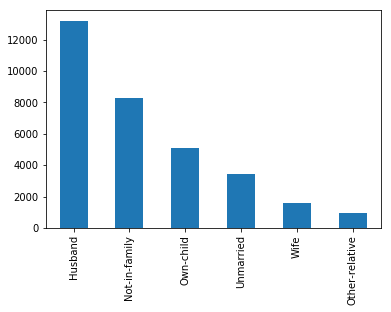

In [21]:
adult["Relationship"].value_counts().plot(kind="bar")

In [22]:
adult["Relationship"].value_counts()

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: Relationship, dtype: int64

In [23]:
 ganhaPouco("Husband","Relationship")

Numero de:  Husband que ganham <=50k : 7275
Numero total de :  Husband 13193
Porcentagem de pessoas que ganham menos de 50k :  55.142878799363295 %
 


In [24]:
ganhaPouco("Not-in-family","Relationship")

Numero de:  Not-in-family que ganham <=50k : 7449
Numero total de :  Not-in-family 8305
Porcentagem de pessoas que ganham menos de 50k :  89.69295605057195 %
 


In [25]:
ganhaPouco("Own-child","Relationship")

ganhaPouco("Unmarried","Relationship")

Numero de:  Own-child que ganham <=50k : 5001
Numero total de :  Own-child 5068
Porcentagem de pessoas que ganham menos de 50k :  98.67797947908446 %
 
Numero de:  Unmarried que ganham <=50k : 3228
Numero total de :  Unmarried 3446
Porcentagem de pessoas que ganham menos de 50k :  93.67382472431805 %
 


In [26]:
ganhaPouco("Wife","Relationship")

Numero de:  Wife que ganham <=50k : 823
Numero total de :  Wife 1568
Porcentagem de pessoas que ganham menos de 50k :  52.48724489795919 %
 


In [27]:
ganhaPouco("Other-relative","Relationship")

Numero de:  Other-relative que ganham <=50k : 944
Numero total de :  Other-relative 981
Porcentagem de pessoas que ganham menos de 50k :  96.2283384301733 %
 


Temos que em 51% dos casos a chance de se ganhar menos de 50k por ano 
eh maior ou igual a 89%. Sendo assim parce razoavel manter esse atributo 
na analise do KNN.

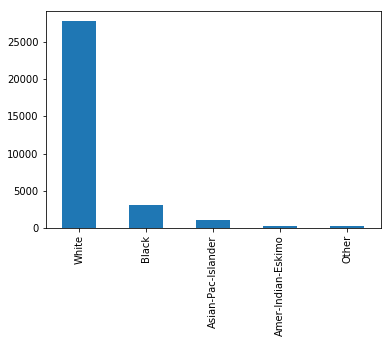

In [28]:
adult["Race"].value_counts().plot(kind="bar")

In [29]:
adult["Race"].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: Race, dtype: int64

In [30]:
ganhaPouco("White","Race")

Numero de:  White que ganham <=50k : 20699
Numero total de :  White 27816
Porcentagem de pessoas que ganham menos de 50k :  74.41400632729365 %
 


Numa traducao direta da base adult a "raca" parce nao ser de interesse na anlise desse classificador haja vista que mais de 85% da populacao, admitindo que esse database seja reprensenativo da populacao a qual se aplicao classificador eh branca, ou seja, quase qualquer ponto tera pessoas brancas ao seu redor seja branco ou nao. Alem disso a renda das pessoas brancas nao parce ser uma certeza devido ao percentual nao muito expressivo de aproximadamente 75% associado as pessoas que ganham menos de 50k anualmente.

Male      21790
Female    10771
Name: Sex, dtype: int64

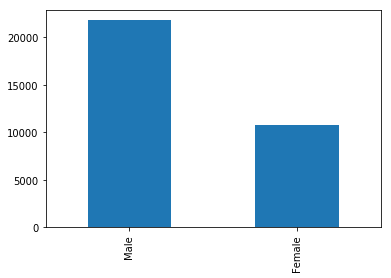

In [31]:
adult["Sex"].value_counts().plot(kind="bar")
adult["Sex"].value_counts()

In [32]:
ganhaPouco("Male","Sex")

Numero de:  Male que ganham <=50k : 15128
Numero total de :  Male 21790
Porcentagem de pessoas que ganham menos de 50k :  69.42634235888022 %
 


Vemos que o Atributo sexo nao eh tao relevante ja que a mairia eh homem e dentro dessa categoria nao temos um numero muito expressivo de pessoas que ganham menos de 50k por ano. Dessa forma nao vale a pena considerar isso ana anlise do KNN.

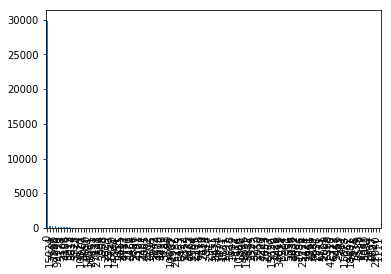

In [33]:
adult["Capital Gain"].value_counts().plot(kind="bar")

In [34]:
adult["Capital Gain"].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
5178        97
3103        97
4386        70
5013        69
8614        55
3325        53
2174        48
10520       43
4064        42
4650        41
14084       41
20051       37
3137        37
27828       34
594         34
3908        32
2829        31
13550       27
6849        27
14344       26
1055        25
2885        24
3411        24
4787        23
2176        23
         ...  
9562         4
1086         4
25124        4
1424         3
2961         3
7896         3
4687         3
2936         3
1173         3
5721         3
2009         3
6360         3
41310        2
6723         2
3456         2
2993         2
401          2
11678        2
2062         2
18481        2
7978         1
1639         1
2538         1
2387         1
5060         1
4931         1
1455         1
6097         1
22040        1
1111         1
Name: Capital Gain, Length: 119, dtype: int64

In [35]:
ganhaPouco(0,"Capital Gain")
ganhaPouco(10520,"Capital Gain")
ganhaPouco(15024,"Capital Gain")
ganhaPouco(99999,"Capital Gain")

Numero de:  0 que ganham <=50k : 23685
Numero total de :  0 29849
Porcentagem de pessoas que ganham menos de 50k :  79.34939193942846 %
 
Numero de:  10520 que ganham <=50k : 0
Numero total de :  10520 43
Porcentagem de pessoas que ganham menos de 50k :  0.0 %
 
Numero de:  15024 que ganham <=50k : 0
Numero total de :  15024 347
Porcentagem de pessoas que ganham menos de 50k :  0.0 %
 
Numero de:  99999 que ganham <=50k : 0
Numero total de :  99999 159
Porcentagem de pessoas que ganham menos de 50k :  0.0 %
 


Vemos que para os casos em que "Capital Gain" eh nao nulo 100% ou praticamente 100% dos casos a pessoas ganham mais de 50K por ano. Dessa forma, apesar da dominancia de pessoas cujo "Capital Gain" eh nulo esse atributo eh determinante da renda o que torna razoavel sua manutencao na analise. Uma logica analoga segue para o "Capital Loss"

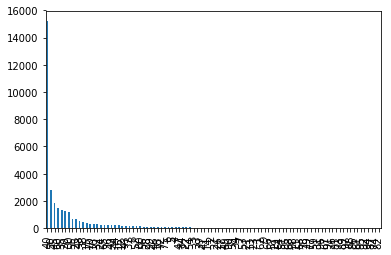

In [36]:
adult["Hours per week"].value_counts().plot(kind="bar")

In [37]:
adult["Hours per week"].value_counts()

40    15217
50     2819
45     1824
60     1475
35     1297
20     1224
30     1149
55      694
25      674
48      517
38      476
15      404
70      291
10      278
32      266
24      252
65      244
36      220
42      219
44      212
16      205
12      173
43      151
37      149
8       145
52      138
80      133
56       97
28       86
99       85
      ...  
19       14
64       14
51       13
85       13
68       12
98       11
11       11
63       10
78        8
29        7
77        6
59        5
31        5
96        5
67        4
91        3
76        3
81        3
73        2
89        2
97        2
88        2
86        2
61        2
95        2
92        1
94        1
87        1
74        1
82        1
Name: Hours per week, Length: 94, dtype: int64

In [38]:
ganhaPouco(80,"Hours per week")
ganhaPouco(77,"Hours per week")
ganhaPouco(50,"Hours per week")
ganhaPouco(45,"Hours per week")
ganhaPouco(40,"Hours per week")
ganhaPouco(20,"Hours per week")
ganhaPouco(29,"Hours per week")
ganhaPouco(19,"Hours per week")

Numero de:  80 que ganham <=50k : 76
Numero total de :  80 133
Porcentagem de pessoas que ganham menos de 50k :  57.142857142857146 %
 
Numero de:  77 que ganham <=50k : 6
Numero total de :  77 6
Porcentagem de pessoas que ganham menos de 50k :  100.0 %
 
Numero de:  50 que ganham <=50k : 1543
Numero total de :  50 2819
Porcentagem de pessoas que ganham menos de 50k :  54.73572188719404 %
 
Numero de:  45 que ganham <=50k : 1139
Numero total de :  45 1824
Porcentagem de pessoas que ganham menos de 50k :  62.44517543859649 %
 
Numero de:  40 que ganham <=50k : 11970
Numero total de :  40 15217
Porcentagem de pessoas que ganham menos de 50k :  78.66202273772754 %
 
Numero de:  20 que ganham <=50k : 1146
Numero total de :  20 1224
Porcentagem de pessoas que ganham menos de 50k :  93.62745098039215 %
 
Numero de:  29 que ganham <=50k : 6
Numero total de :  29 7
Porcentagem de pessoas que ganham menos de 50k :  85.71428571428571 %
 
Numero de:  19 que ganham <=50k : 14
Numero total de :  19

A principio parece interessante considerar as horas trabalhadas por semana nessa analise. O problema é que quase metade das pessoas trabalham a mesma quantidade de horas (40h), e dentro desse grupo não há uma definicao exatada da renda dessas pessoas. Também observa-se que outros regimes de trabalhos mais frequentes tambem nao determinam muito bem a renda das pessoas inseridos neles. Sendo assim, optou-se por nao considerar esse atributo na elaboracao do KNN.

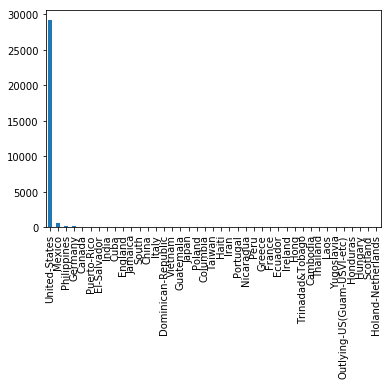

In [39]:
adult["Country"].value_counts().plot(kind="bar")

Quase todos sao estadunidenses. Nao parece interessante usar esse atributo no KNN.